# Classification k-means
Not supervised classification based in k-means 

In [39]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
import time

print('Libraries imported successfully')

Libraries imported successfully


In [40]:
seg_start=time.time() #For checking ejecution time

Tell GDAL to throw Python exceptions, and register all drivers

In [41]:
gdal.UseExceptions()
gdal.AllRegister()

**Define directories**

 - <b>layer_path</b>: input layer path for masking
 
 - <b>raser_path</b>: path of the raster image to be masked
  
 - <b>out_tif</b>: output path to save the mask image

In [42]:
tmp= '/home/jovyan/work/DATASET/'
tmp_raster = 'valenciana_704000.0-4400000.0_comunidad_mask.tif'

raster_path = f'{tmp}Dataset_processing/Tiling/{tmp_raster}'
output = f'{tmp}OBIA/Classification/kmeans_{tmp_raster}'

Set number of clusters

In [43]:
n_clusters=10

Read in a raster image

In [44]:
img_ds = gdal.Open(raster_path, gdal.GA_ReadOnly)
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount), gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)) #initialisation

Read data from img_ds to img

In [45]:
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()

new_shape = (img.shape[0] * img.shape[1], img.shape[2])
X = img[:, :, :13].reshape(new_shape)

In [46]:
X_cluster 

array([[6, 1, 7, ..., 6, 6, 6],
       [9, 3, 1, ..., 7, 7, 7],
       [9, 3, 1, ..., 7, 7, 6],
       ...,
       [0, 0, 0, ..., 7, 6, 6],
       [0, 0, 0, ..., 4, 6, 6],
       [0, 0, 0, ..., 4, 4, 6]], dtype=int32)

### KMeans algorithm
Applies the algorithm with the number of clusters chosen

In [21]:
k_means = cluster.KMeans(n_clusters)
k_means.fit(X)
X_cluster = k_means.labels_ # make labels 
X_cluster = X_cluster.reshape(img[:, :, 0].shape) # reshape to raster 

KeyboardInterrupt: 

Show classification

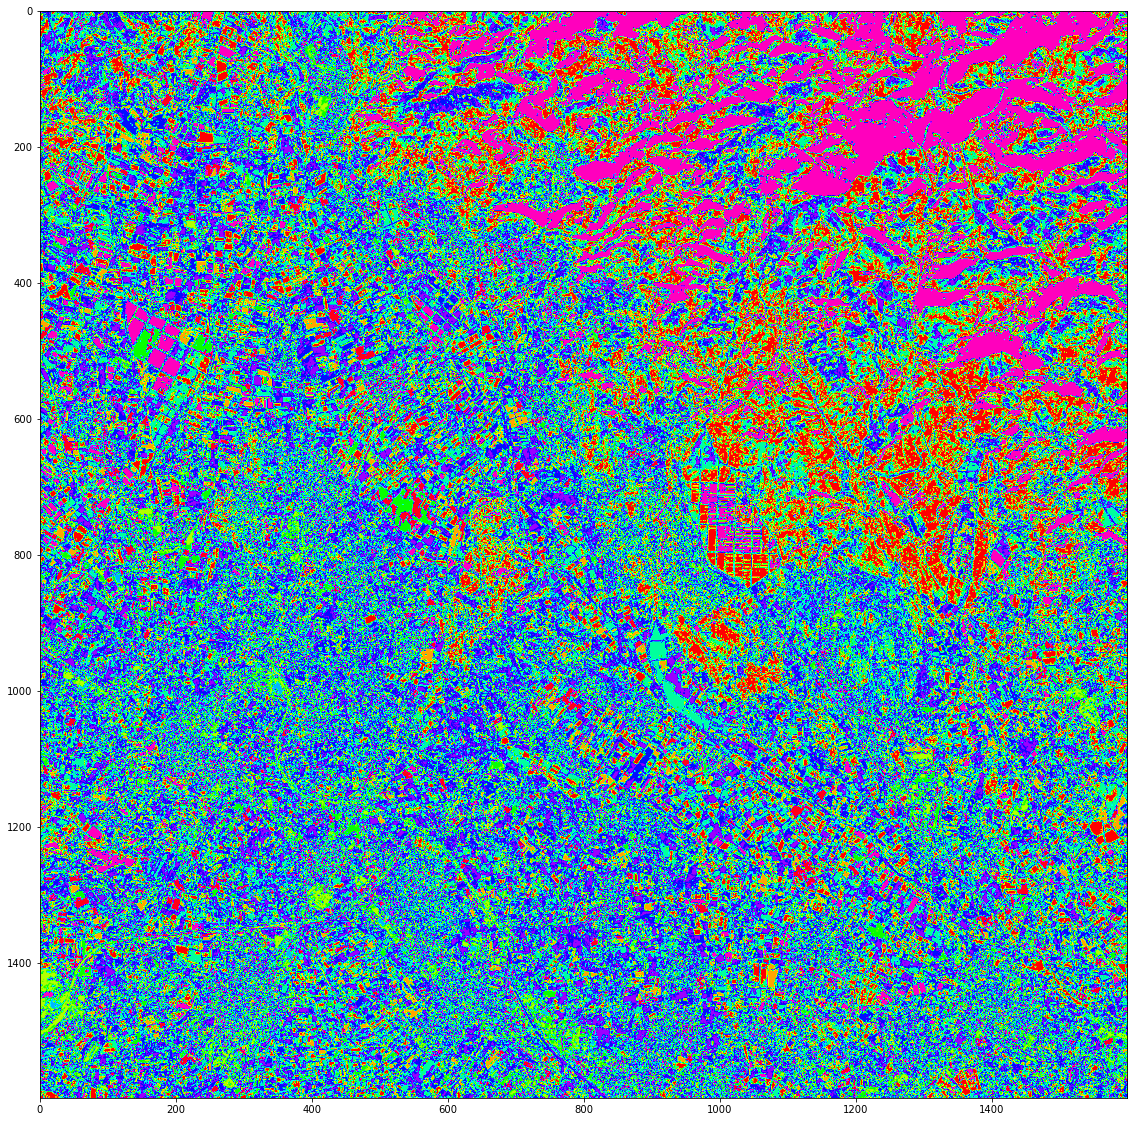

In [47]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")
plt.show()

Read metadata for saving

In [48]:
ds = gdal.Open(raster_path)
band = ds.GetRasterBand(2)
arr = band.ReadAsArray()
[cols, rows] = arr.shape

Save classification

In [49]:
driver = gdal.GetDriverByName("GTiff")
outDataRaster = driver.Create(output, rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(ds.GetGeoTransform()) # sets same geotransform as input
outDataRaster.SetProjection(ds.GetProjection()) # sets same projection as input

outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

0

In [50]:
print(f'Classification with image finished successfully in {time.time() - seg_start} s')

Classification with image finished successfully in 21.11974287033081 s
